In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Ecommerce Purchases.csv")

In [4]:
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [5]:
df.dtypes

Address              object
Lot                  object
AM or PM             object
Browser Info         object
Company              object
Credit Card           int64
CC Exp Date          object
CC Security Code      int64
CC Provider          object
Email                object
Job                  object
IP Address           object
Language             object
Purchase Price      float64
dtype: object

In [6]:
df.shape

(10000, 14)

In [7]:
sum(df['Language']=='en')

1098

In [8]:
df[df['Language']=='en'].count()

Address             1098
Lot                 1098
AM or PM            1098
Browser Info        1098
Company             1098
Credit Card         1098
CC Exp Date         1098
CC Security Code    1098
CC Provider         1098
Email               1098
Job                 1098
IP Address          1098
Language            1098
Purchase Price      1098
dtype: int64

In [9]:
df.pivot_table(index='AM or PM',values='Language',aggfunc='count')

,Language
AM or PM,
AM,4932
PM,5068


In [10]:
df['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [11]:
df.groupby('AM or PM').count()['Address']

AM or PM
AM    4932
PM    5068
Name: Address, dtype: int64

In [12]:
df[df['Credit Card'] == 4926535242672853]['Email']

1234    bondellen@williams-garza.com
Name: Email, dtype: object

In [13]:
df[(df['CC Provider']=='American Express')  &  (df['Purchase Price'] > 95)]['Lot'].count()

39

In [14]:
sum(df["CC Exp Date"].astype('str').str.contains('25'))

1033

In [15]:
sum(df['CC Exp Date'].apply(lambda x: x[3:]) == '25')

1033

In [16]:
def countemail(lst, x): 
    count = 0
    for ele in lst: 
        if (ele == x): 
            count = count + 1
    return count 

In [17]:
lss=[]
for i in df['Email']:
    ls = i.split('@')
    lss.append(ls[1])
my_dict = {i:lss.count(i) for i in lss}
# print(my_dict)
em = pd.DataFrame(my_dict,index=[0])
em.transpose()

,0
yahoo.com,1616
reed.com,8
morales-harrison.com,1
olson-robinson.info,1
gmail.com,1605
...,...
schwartz.com,1
novak.biz,1
sherman.biz,1
wise-liu.com,1


In [18]:
lss=[]
for i in df['Email']:
    ls = i.split('@')
    lss.append(ls[1])
# my_dict = {i:lss.count(i) for i in lss}
# print(my_dict)
em = pd.DataFrame(lss)
em[0].value_counts()

hotmail.com               1638
yahoo.com                 1616
gmail.com                 1605
smith.com                   42
williams.com                37
                          ... 
griffin-thomas.com           1
branch.com                   1
mcdaniel.org                 1
weiss-harrison.com           1
castillo-robertson.com       1
Name: 0, Length: 3416, dtype: int64

In [19]:
df['Email'].apply(lambda x: x.split('@')[1]).value_counts()

hotmail.com               1638
yahoo.com                 1616
gmail.com                 1605
smith.com                   42
williams.com                37
                          ... 
griffin-thomas.com           1
branch.com                   1
mcdaniel.org                 1
weiss-harrison.com           1
castillo-robertson.com       1
Name: Email, Length: 3416, dtype: int64

In [75]:
def emailid(x):
    return x.split('@')[1]

In [76]:
df['Email'].apply(lambda x: emailid(x)).value_counts().head(3)

hotmail.com    1638
yahoo.com      1616
gmail.com      1605
Name: Email, dtype: int64

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([485., 512., 483., 493., 504., 507., 484., 518., 455., 507., 510.,
        490., 497., 492., 498., 499., 506., 501., 552., 507.]),
 array([ 0.    ,  4.9995,  9.999 , 14.9985, 19.998 , 24.9975, 29.997 ,
        34.9965, 39.996 , 44.9955, 49.995 , 54.9945, 59.994 , 64.9935,
        69.993 , 74.9925, 79.992 , 84.9915, 89.991 , 94.9905, 99.99  ]),
 <a list of 20 Patch objects>)

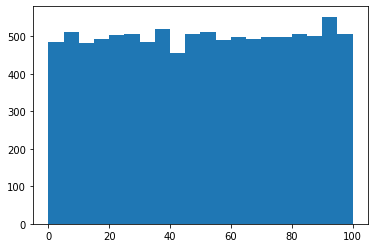

In [22]:
# plt.ylim(500)
plt.hist(df['Purchase Price'],bins=20)